#**Arithmetic functions with images**
By Roei Zaady 2023, based on the course "intro to Computer Vision" by the University of Georgia Tech

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

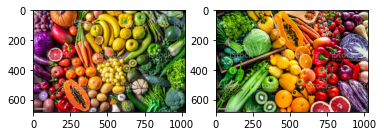

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/מדיה/istockphoto-1284690585-1024x1024.jpg', 3)
img2 = cv.imread('/content/drive/MyDrive/מדיה/istockphoto-1208790371-1024x1024.jpg', 3)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axarr[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB)) 
#cv.cvtColor(img1, cv.COLOR_BGR2RGB) is needed as plt shows image as numpy array in BGR and not as RGB
plt.show()

In [ ]:
print('img1 dimensions: ' + str(img1.shape) + '\nimg2 dimensions: '+ str(img2.shape))

img1 dimensions: (683, 1024, 3)
img2 dimensions: (683, 1024, 3)


##Addition
Two images can be "combined" - each pixel RGB's values will be added to the RGB's values of the corresponding pixel - as long as they have the same dimensions.



In [ ]:
summed = img1 + img2
cv2_imshow(summed)

Output hidden; open in https://colab.research.google.com to view.

Since each RGB value gets higher, the image gets brighter. Some pixels can reach the max 255 value limit.
Therefore, we should scale down the image's brightness prior to using addition.

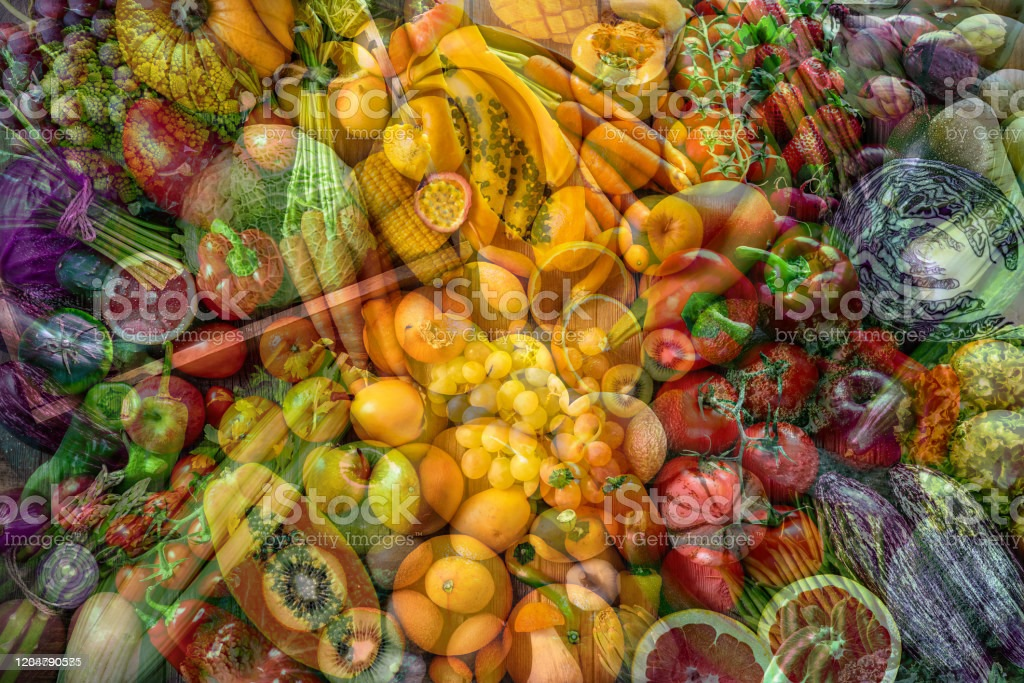

In [ ]:
average_values_of_both_images = img1 / 2 + img2 / 2
cv2_imshow(average_values_of_both_images)

Much better!

It's importent to know that inorder to avoid cutting off sums of values which have reached the 255 maximum, the order of averaging is important!

a/2+b/2!=a+b/2

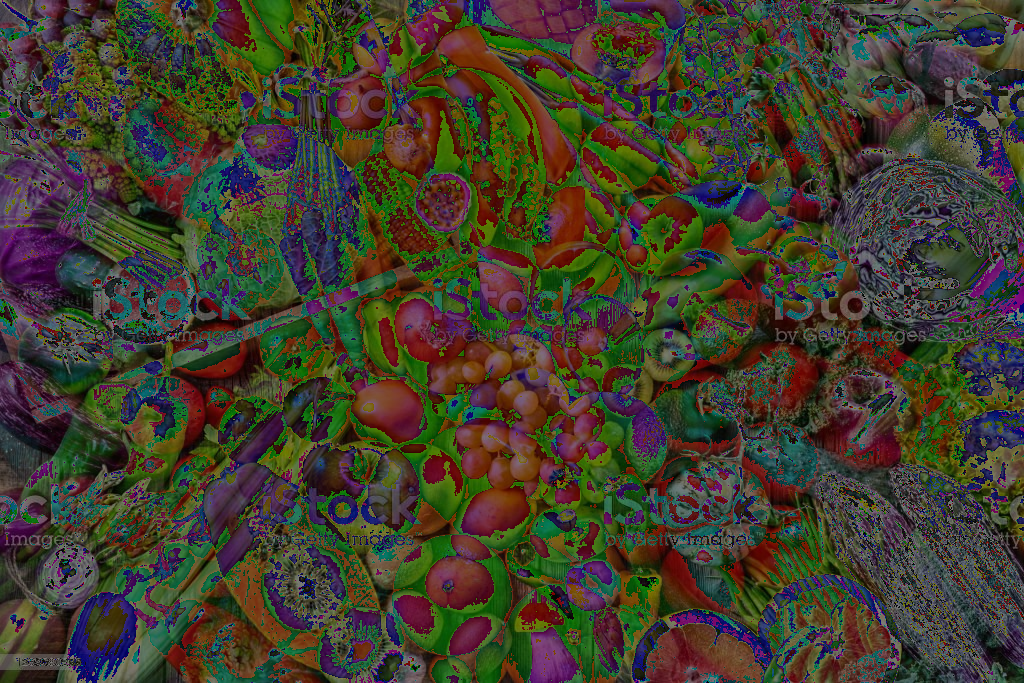

In [ ]:
cv2_imshow((img1+img2)/2) 

Noise functions

Noise - is a function which adds or subtract values of intesity to an image, causing it to become "pixelated".


I'(x,y) = I(x,y) + n(x,y)

Gaussion Noise is a noise function whose intesity values are based on the normal distribution.

In [ ]:
#lets create a Guassion noise function

Gnoise = np.random.normal(loc = img1.mean(), scale = img1.std(), size = img1.shape)
Gnoise

array([[[ 2.25013676e+02,  1.87158862e+02,  4.26005812e+01],
        [ 6.56916321e+01,  7.04157377e+01,  6.10887087e+01],
        [ 1.90830447e+02,  1.68098830e+01, -3.25044756e+01],
        ...,
        [-7.54978211e+00,  1.17946552e+02,  6.40481795e+01],
        [ 4.88921167e+01,  4.55101111e+01, -1.58111151e+02],
        [ 2.21936253e+02,  4.55443123e+01,  4.15706719e+00]],

       [[-1.93829227e-01,  7.27315568e+00,  6.09711894e+01],
        [-1.22123766e+00,  1.40445525e+02,  4.94866369e+01],
        [ 1.96977931e+02, -2.94212774e+01,  8.45782210e+01],
        ...,
        [ 1.10304952e+02,  6.63549839e+01,  1.32115424e+02],
        [ 2.24198822e+02,  1.23056310e+02,  2.39372846e+01],
        [ 1.23755493e+02,  1.46455703e+02,  1.54729489e+02]],

       [[ 5.11493896e+01,  2.17732602e+02,  5.22136591e+01],
        [-2.67810513e+00,  8.41785906e+01,  1.92543754e+02],
        [ 6.12538524e+01,  1.93003105e+02,  2.82037003e+00],
        ...,
        [ 1.52290144e+02,  1.54124413e+02,

In [ ]:
#and use it to make an image
noisy_image = img1 + Gnoise
cv2_imshow(noisy_image)

Output hidden; open in https://colab.research.google.com to view.

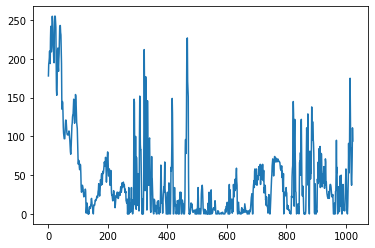

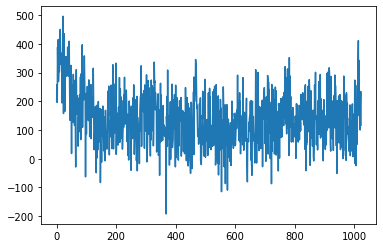

In [50]:
#taking a look inside the image
plt.plot(img1[200,:,0])
plt.show()
plt.plot(noisy_image[200,:,0])
plt.show()

Subtracting Images

Like any scalar subtraction, order matter.
Moreover, since the images are stored as uint (unsigned), any negative value turn to zero. 

Therefore, in order to preserve the difference, we must convert the values from unit to int, and scale it so min value will be zero and max value will be 255 to turn everything back to their normal ranged values.

the scalling part should only be done to display an image! Not during calculations.

In [54]:
#incorrect
cv2_imshow(img1 - img2)
#correct
cv2_imshow(img1.astype('int') - img2.astype('int'))

Output hidden; open in https://colab.research.google.com to view.

Scallling an Image

If we wish to tell imshow to normalize the image based on its lowest value as 0 and highest value as 1, then simply pass cv2.imshow(<img>, []).

*works only in matlab